### Develop LSTM Models For Univariate Time Series Forecasting

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [35]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [36]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [37]:
print(X),print(y)


[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [38]:
X.shape

(6, 3)

In [39]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Building LSTM Model

In [40]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dense(1))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 31522.7246
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 30780.1484
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 29807.2715
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 29098.5254
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 28750.4434
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 28544.4785
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 28373.8926
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 28207.3516
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 28036.4297
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 27859.1699
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 27675.4746
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 27485.7598
Epoch 13/30
1/1 [====

## Predicting For the next 10 data

In [43]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[44.369076]
1 day input [196.         210.          44.36907578]
1 day output [[50.654064]]
2 day input [210.          44.36907578  50.65406418]
2 day output [[36.6351]]
3 day input [44.369076 50.654064 36.6351  ]
3 day output [[10.873111]]
4 day input [50.654064 36.6351   10.873111]
4 day output [[9.286577]]
5 day input [36.6351   10.873111  9.286577]
5 day output [[3.9933417]]
6 day input [10.873111   9.286577   3.9933417]
6 day output [[1.0442688]]
7 day input [9.286577  3.9933417 1.0442688]
7 day output [[0.51469016]]
8 day input [3.9933417  1.0442688  0.51469016]
8 day output [[0.18655077]]
9 day input [1.0442688  0.51469016 0.18655077]
9 day output [[0.09207755]]
[44.369076, 50.654064, 36.6351, 10.873111, 9.286577, 3.9933417, 1.0442688, 0.51469016, 0.18655077, 0.092077546]


In [44]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [45]:
len(timeseries_data)

9

In [46]:
lst_output

[44.369076,
 50.654064,
 36.6351,
 10.873111,
 9.286577,
 3.9933417,
 1.0442688,
 0.51469016,
 0.18655077,
 0.092077546]

## Visualizaing The Output

In [47]:
import matplotlib.pyplot as plt

In [48]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

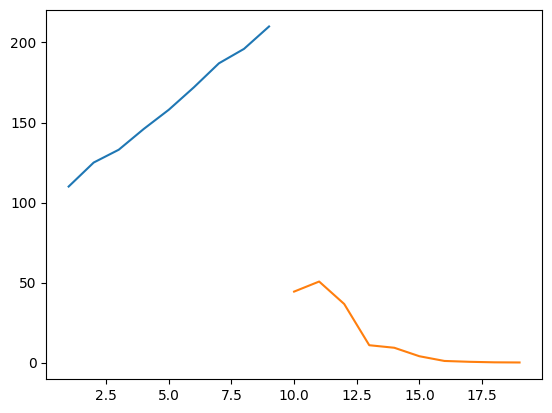

In [49]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)